In [1]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Carregamento do Dataset

In [2]:
# Importa a biblioteca pandas com o alias pd
import pandas as pd

# Lê o conjunto de dados de avaliação de carros de um arquivo usando a função read_fwf() do pandas.
# O argumento "../Data/wine/wine.data" indica o caminho do arquivo de dados.
# O parâmetro header=None especifica que o arquivo não possui uma linha de cabeçalho.
df = pd.read_fwf("../Data/wine/wine.data", header=None)

# Divide os valores na primeira coluna do DataFrame df (que contém todas as linhas do arquivo lido)
# com base na vírgula como delimitador.
# O método str.split() divide cada valor da primeira coluna em uma lista de strings,
# e o parâmetro expand=True expande essa lista de strings em colunas separadas.
df = df[0].str.split(',', expand=True)

# Renomeia as colunas do DataFrame para 'buying' (compra), 'maint' (manutenção), 'doors' (portas),
# 'persons' (pessoas), 'lug_boot' (porta-malas), 'safety' (segurança) e 'class' (classe).
# Esses são os nomes das características dos veículos no conjunto de dados, conforme fornecido 
# pelo arquivo car.c45-names
df.columns = ['Classe', 'Teor Alcoólico', 'Ácido Málico', 'Cinzas', 'Alcalinidade das Cinzas', 'Magnésio',
           'Fenóis Totais', 'Flavonoides', 'Fenóis não Flavonoides', 'Proantocianidinas',
           'Intensidade de Cor', 'Tonalidade', 'Absorbância Óptica (OD280/OD315) de Vinhos Diluídos', 'Proline']

# Exibe as primeiras linhas do DataFrame, permitindo visualizar as colunas e os dados carregados.
df.head()


Classe Teor Alcoólico Ácido Málico Cinzas Alcalinidade das Cinzas Magnésio  \
0      1          14.23         1.71   2.43                    15.6      127   
1      1           13.2         1.78   2.14                    11.2      100   
2      1          13.16         2.36   2.67                    18.6      101   
3      1          14.37         1.95    2.5                    16.8      113   
4      1          13.24         2.59   2.87                      21      118   

  Fenóis Totais Flavonoides Fenóis não Flavonoides Proantocianidinas  \
0           2.8        3.06                    .28              2.29   
1          2.65        2.76                    .26              1.28   
2           2.8        3.24                     .3              2.81   
3          3.85        3.49                    .24              2.18   
4           2.8        2.69                    .39              1.82   

  Intensidade de Cor Tonalidade  \
0               5.64       1.04   
1               4.38       1.05   
2               5.68       1.03   
3                7.8        .86   
4               4.32       1.04   

  Absorbância Óptica (OD280/OD315) de Vinhos Diluídos Proline  
0                                               3.92     1065  
1                                                3.4     1050  
2                                               3.17     1185  
3                                               3.45     1480  
4                                               2.93      735

In [3]:
tipos_de_dados = {
    'Teor Alcoólico': float,
    'Ácido Málico': float,
    'Cinzas': float,
    'Alcalinidade das Cinzas': float,
    'Magnésio': int,
    'Fenóis Totais': float,
    'Flavonoides': float,
    'Fenóis não Flavonoides': float,
    'Proantocianidinas': float,
    'Intensidade de Cor': float,
    'Tonalidade': float,
    'Absorbância Óptica (OD280/OD315) de Vinhos Diluídos': float,
    'Proline': int
}

for col in tipos_de_dados:
    df[col] = df[col].astype(tipos_de_dados[col])
    
df.dtypes

Classe                                                  object
Teor Alcoólico                                         float64
Ácido Málico                                           float64
Cinzas                                                 float64
Alcalinidade das Cinzas                                float64
Magnésio                                                 int32
Fenóis Totais                                          float64
Flavonoides                                            float64
Fenóis não Flavonoides                                 float64
Proantocianidinas                                      float64
Intensidade de Cor                                     float64
Tonalidade                                             float64
Absorbância Óptica (OD280/OD315) de Vinhos Diluídos    float64
Proline                                                  int32
dtype: object

In [4]:
df.describe().T

count        mean  \
Teor Alcoólico                                      178.0   13.000618   
Ácido Málico                                        178.0    2.336348   
Cinzas                                              178.0    2.366517   
Alcalinidade das Cinzas                             178.0   19.494944   
Magnésio                                            178.0   99.741573   
Fenóis Totais                                       178.0    2.295112   
Flavonoides                                         178.0    2.029270   
Fenóis não Flavonoides                              178.0    0.361854   
Proantocianidinas                                   178.0    1.590899   
Intensidade de Cor                                  178.0    5.058090   
Tonalidade                                          178.0    0.957449   
Absorbância Óptica (OD280/OD315) de Vinhos Dilu...  178.0    2.611685   
Proline                                             178.0  746.893258   

                                                           std     min  \
Teor Alcoólico                                        0.811827   11.03   
Ácido Málico                                          1.117146    0.74   
Cinzas                                                0.274344    1.36   
Alcalinidade das Cinzas                               3.339564   10.60   
Magnésio                                             14.282484   70.00   
Fenóis Totais                                         0.625851    0.98   
Flavonoides                                           0.998859    0.34   
Fenóis não Flavonoides                                0.124453    0.13   
Proantocianidinas                                     0.572359    0.41   
Intensidade de Cor                                    2.318286    1.28   
Tonalidade                                            0.228572    0.48   
Absorbância Óptica (OD280/OD315) de Vinhos Dilu...    0.709990    1.27   
Proline                                             314.907474  278.00   

                                                         25%      50%  \
Teor Alcoólico                                       12.3625   13.050   
Ácido Málico                                          1.6025    1.865   
Cinzas                                                2.2100    2.360   
Alcalinidade das Cinzas                              17.2000   19.500   
Magnésio                                             88.0000   98.000   
Fenóis Totais                                         1.7425    2.355   
Flavonoides                                           1.2050    2.135   
Fenóis não Flavonoides                                0.2700    0.340   
Proantocianidinas                                     1.2500    1.555   
Intensidade de Cor                                    3.2200    4.690   
Tonalidade                                            0.7825    0.965   
Absorbância Óptica (OD280/OD315) de Vinhos Dilu...    1.9375    2.780   
Proline                                             500.5000  673.500   

                                                         75%      max  
Teor Alcoólico                                       13.6775    14.83  
Ácido Málico                                          3.0825     5.80  
Cinzas                                                2.5575     3.23  
Alcalinidade das Cinzas                              21.5000    30.00  
Magnésio                                            107.0000   162.00  
Fenóis Totais                                         2.8000     3.88  
Flavonoides                                           2.8750     5.08  
Fenóis não Flavonoides                                0.4375     0.66  
Proantocianidinas                                     1.9500     3.58  
Intensidade de Cor                                    6.2000    13.00  
Tonalidade                                            1.1200     1.71  
Absorbância Óptica (OD280/OD315) de Vinhos Dilu...    3.1700     4.00  
Proline                          

# Análises Univariadas

## Teor Alcoolico

In [5]:
df['Teor Alcoólico'].describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: Teor Alcoólico, dtype: float64

In [6]:
# Plot do histograma do teor alcoólico
fig = px.histogram(df, x='Teor Alcoólico', nbins=20, title='Histograma do Teor Alcoólico', marginal="box")
fig.update_layout(
    width = 1200,
    height = 900
)
fig.show()

Podemos perceber que os dados possuem uma distribuição aparentemente normal (Média ~ Mediana ~ Moda), com uma curva bastante fechada (Desvio padrão muito baixo)

## Tonalidade

In [7]:
df['Tonalidade'].describe()

count    178.000000
mean       0.957449
std        0.228572
min        0.480000
25%        0.782500
50%        0.965000
75%        1.120000
max        1.710000
Name: Tonalidade, dtype: float64

In [8]:
# Plot do histograma de Tonalidades
fig = px.histogram(df, x='Tonalidade', nbins=20, title='Histograma das Tonalidades', marginal="rug")
fig.update_layout(
    width = 1200,
    height = 900
)
fig.show()

Novamente, podemos perceber uma distribuição aparentemente normal (Média ~ Mediana ~ Moda) nos dados, desta vez com uma curva um pouco mais aberta (Maior `desvio padrão / média`)

## Magnésio

In [9]:
df['Magnésio'].describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: Magnésio, dtype: float64

In [10]:
# Plot do histograma de Tonalidades
fig = px.histogram(df, x='Magnésio', nbins=20, title='Histograma de Magnésio', marginal="violin")
fig.update_layout(
    width = 1200,
    height = 900
)
fig.show()

Para o magnésio, percebemos que a curva está ligeiramente inclinada para a esquerda, demonstrando uma quantidade maior de dados abaixo da média. Além disso, percebe-se a presença de outliers.

## Intensidade de Cor

In [11]:
df['Intensidade de Cor'].describe()

count    178.000000
mean       5.058090
std        2.318286
min        1.280000
25%        3.220000
50%        4.690000
75%        6.200000
max       13.000000
Name: Intensidade de Cor, dtype: float64

In [12]:
# Plot do histograma de Tonalidades
fig = px.histogram(df, x='Intensidade de Cor', nbins=20, title='Histograma das Intensidades de Cor', marginal="violin")
fig.update_layout(
    width = 1200,
    height = 900
)
fig.show()

Novamente, percebemos que a curva está ligeiramente inclinada para a esquerda, demonstrando uma quantidade maior de dados abaixo da média. Além disso, percebe-se a presença de outliers.

## Classes

In [13]:
classe_counts = df['Classe'].value_counts()

In [14]:
# Plot do gráfico de pizza das classes
fig = px.pie(names=classe_counts.index, values=classe_counts.values, title='Distribuição das Classes')
fig.update_layout(
    width = 1200,
    height = 900
)
fig.show()

Prercebemos que a classe 2 está ligeiramente dominante, especialmente sobre a classe 3. É importante observar se esse desbalanceamento trará algum impacto nos próximos passos das análises / modelamentos. 

# Análises Multivariadas

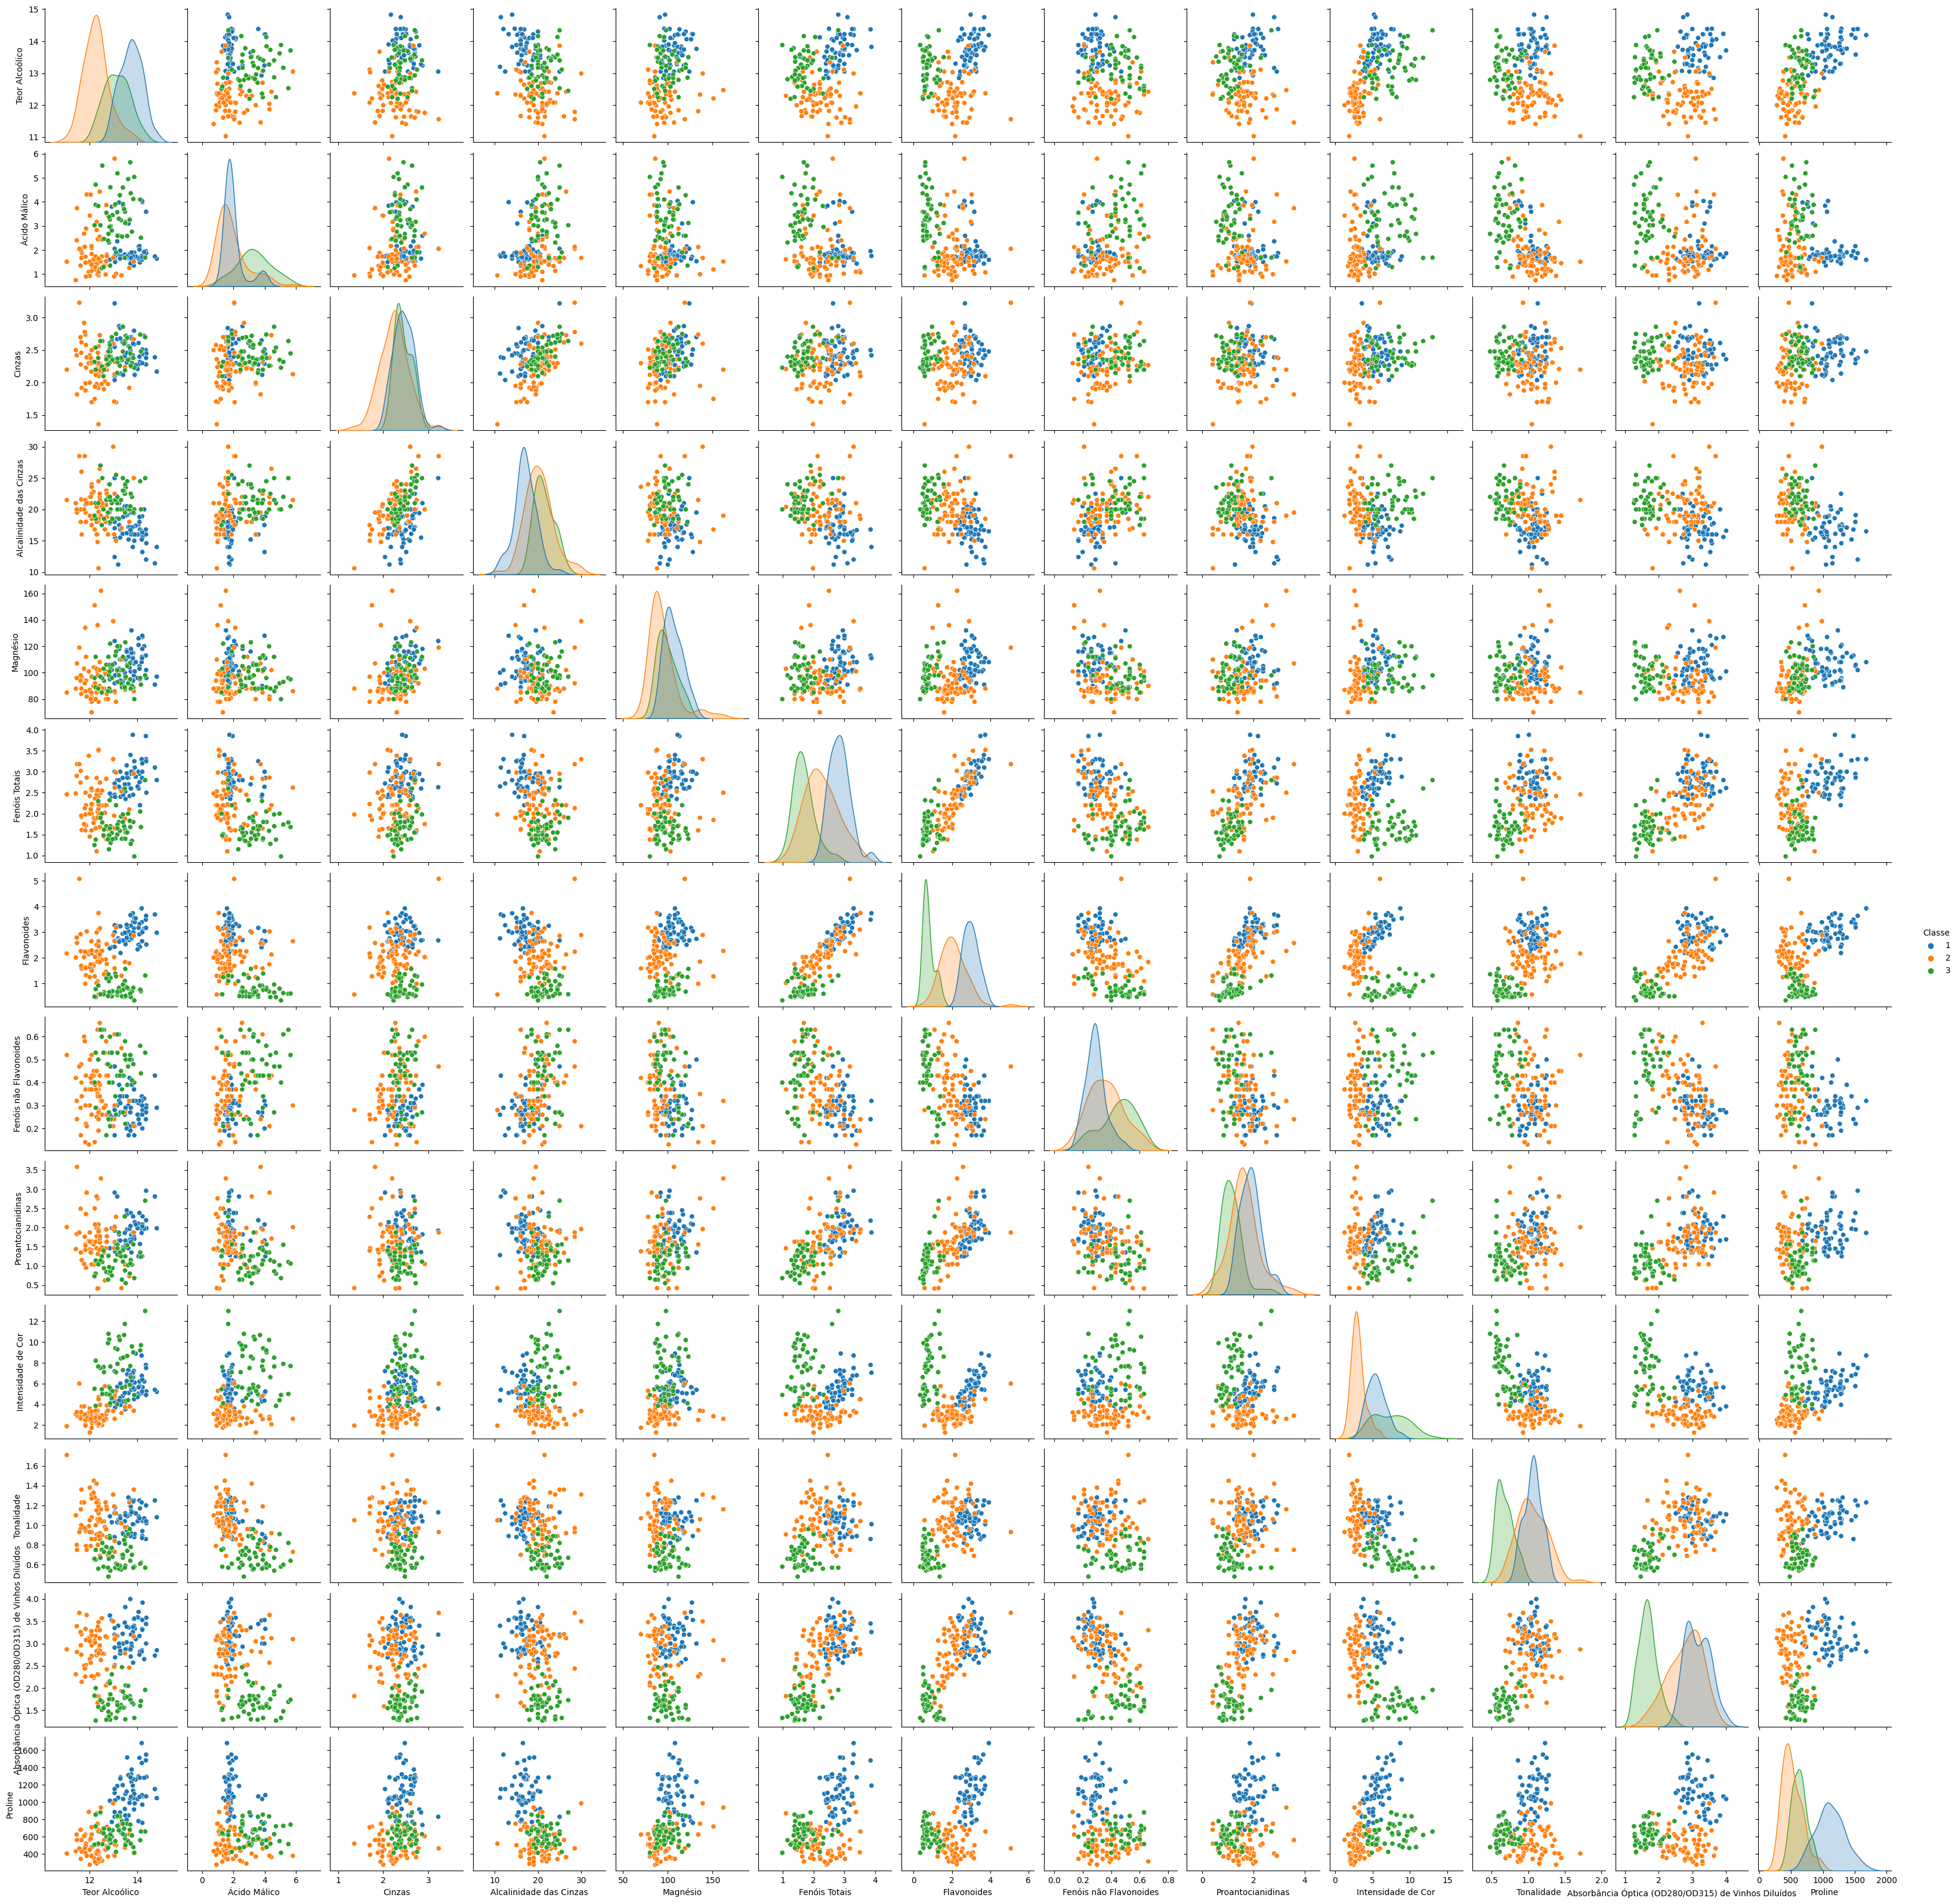

In [15]:
sns.pairplot(df, hue='Classe')

Utilizando um gráfico de plotagem em pares, podemos perceber algumas características do dataset:  
* Algumas classes possuem algumas regiões "exclusivas" em certas características, mas é impossível separá-las utilizando apenas uma das características, uma vez que sempre existe algum *overlap*. Ex: Intensidades de cores menores remetem à classe 2, porém intensidades de cores médias e altas também podem estar nesta classe.  
* Da mesma forma, "Flavonoides" baixos representam a classe 3 (verde), porém existem classes 2 e 1 nesta mesma zona, dificultando o a separação. 
* É possível identificar uma correlação aparentemente forte e positiva entre as características "Flavonoides" e "Fenóis Totais", e essa correlação fica mais evidente quando avaliamos as 3 classes juntas. Aparentemente, quando observamos apenas a classe 3 (verde), a correlação não é táo evidente (gráficos abaixo)


In [16]:

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=df[df['Classe'] == '1']['Flavonoides'], y=df[df['Classe'] == '1']['Fenóis Totais'], mode='markers', name='Classe 1', legendgroup = 'Conjunto'), row=1, col=1)
fig.add_trace(go.Scatter(x=df[df['Classe'] == '2']['Flavonoides'], y=df[df['Classe'] == '2']['Fenóis Totais'], mode='markers', name='Classe 2', legendgroup = 'Conjunto'), row=1, col=1)
fig.add_trace(go.Scatter(x=df[df['Classe'] == '3']['Flavonoides'], y=df[df['Classe'] == '3']['Fenóis Totais'], mode='markers', name='Classe 3', legendgroup = 'Conjunto'), row=1, col=1)
fig.add_trace(go.Scatter(x=df[df['Classe'] == '3']['Flavonoides'], y=df[df['Classe'] == '3']['Fenóis Totais'], mode='markers', name='Classe 3', legendgroup = 'Isolado'), row=1, col=2)
fig.update_layout(
    width=1200, height = 800
)
fig.show()